In [72]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [108]:
all_data = pd.read_pickle('./data/no_singletons_data.pkl')

print(all_data)
# all_data = all_data.drop_duplicates(subset=['Team', 'Opponent'])
# all_data = all_data.groupby(['Team', 'Opponent'], as_index=False).mean()
# Group by 'Date', 'Team', and 'Opponent' 


all_data

                   Team          Opponent  Diff    Tm   Opp
0     Abilene Christian      Grand Canyon  -2.0  71.5  73.5
1     Abilene Christian          NC State -20.0  64.0  84.0
2     Abilene Christian        Western Ky  -2.0  84.0  86.0
4             Air Force       Boise State -34.5  52.0  86.5
5             Air Force    Colorado State  -9.0  71.0  80.0
...                 ...               ...   ...   ...   ...
1480         Washington  Washington State   1.5  80.5  79.0
1481        Weber State              Yale  10.0  75.0  65.0
1482   Western Illinois         Wisconsin -22.0  49.0  71.0
1483         Western Ky     Wichita State -10.0  61.0  71.0
1484         Western Ky      Wright State   7.0  91.0  84.0

[1391 rows x 5 columns]


,Team,Opponent,Diff,Tm,Opp
0,Abilene Christian,Grand Canyon,-2.0,71.5,73.5
1,Abilene Christian,NC State,-20.0,64.0,84.0
2,Abilene Christian,Western Ky,-2.0,84.0,86.0
4,Air Force,Boise State,-34.5,52.0,86.5
5,Air Force,Colorado State,-9.0,71.0,80.0
...,...,...,...,...,...
1480,Washington,Washington State,1.5,80.5,79.0
1481,Weber State,Yale,10.0,75.0,65.0
1482,Western Illinois,Wisconsin,-22.0,49.0,71.0
1483,Western Ky,Wichita State,-10.0,61.0,71.0


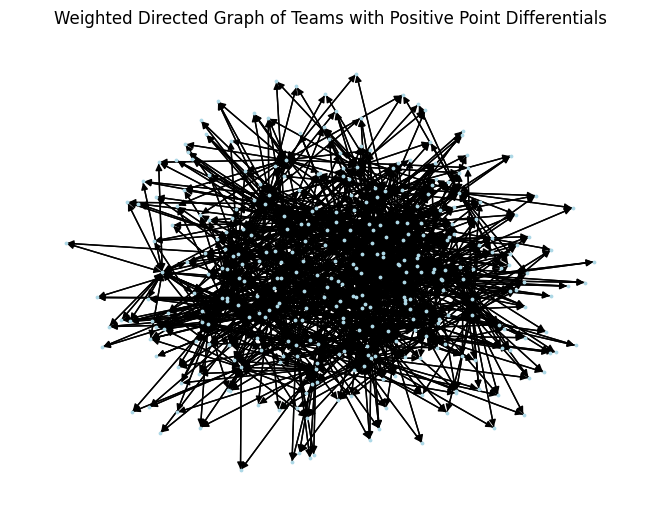

In [115]:
df = all_data.copy()

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the positive point differential
for index, row in df.iterrows():
    # if row['Diff'] > 0:
    G.add_edge(row['Team'], row['Opponent'], weight=row['Opp'], id=index)
    # else:
    G.add_edge(row['Opponent'], row['Team'], weight=row['Tm'], id=index)


# Draw the graph with edge labels (weights)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=3, node_color='lightblue', font_size=1, font_color='black', font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=10)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Weighted Directed Graph of Teams with Positive Point Differentials")
plt.show()


In [ ]:
pagerank = nx.pagerank(G, weight='weight', max_iter=100, alpha=0.95) 

import random
import numpy as np

def random_edge_subgraph(graph, drop_rate):
    sample_edges = random.sample(graph.edges(), int(graph.number_of_edges() * (1 - drop_rate)))
    return nx.edge_subgraph(graph, sample_edges), sample_edges

def ransac(graph, num_iters=1000, drop_rate=0.05):
    
    full_graph_pagerank = nx.pagerank(graph, weight='weight', max_iter=100, alpha=0.95)
    full_rank = np.array([full_graph_pagerank[node] for node in graph.nodes()])

    sample_ranks = []
    for i in range(num_iters):
        subgraph, subgraph_edges = random_edge_subgraph(graph, drop_rate)
        sample_pagerank = nx.pagerank(subgraph, weight='weight', max_iter=100, alpha=0.95)
        sample_rank = np.array([sample_pagerank[node] for node in subgraph.nodes()])
        sample_ranks.append(sample_rank)
        
        median = np.median(full_rank)
        mad = np.median(np.abs(full_rank - median))
        
        inliers = np.abs(sample_rank - median) < 2 * mad
        if np.sum(inliers) > 0.8 * len(inliers):
            return inliers, sample_rank, subgraph_edges, sample_ranks[:-1], i

    raise Exception("No inliers found; try increasing num_iters or decreasing drop_rate")







# lst = list(pagerank.items())
# lst.sort(key=lambda x: -x[1])

# for node, rank in lst: 
#     print(f"{node}: {rank:.5f}")

Alabama: 0.01328
Tennessee: 0.01155
Kentucky: 0.01144
Purdue: 0.01112
NC State: 0.01109
UNC: 0.01104
UConn: 0.01102
Illinois: 0.01100
Duke: 0.01087
Baylor: 0.01073
Clemson: 0.01066
Florida Atlantic: 0.01063
Florida: 0.01061
Iowa State: 0.01057
Arizona: 0.01036
Auburn: 0.01035
Texas: 0.01027
Houston: 0.01018
Kansas: 0.01012
TCU: 0.01009
Texas Tech: 0.01002
Dayton: 0.00999
BYU: 0.00975
Texas A&M: 0.00961
Michigan State: 0.00960
Duquesne: 0.00934
UAB: 0.00931
Creighton: 0.00928
Marquette: 0.00925
Colorado: 0.00923
Mississippi State: 0.00915
Northwestern: 0.00902
James Madison: 0.00900
Nebraska: 0.00894
San Diego State: 0.00891
South Carolina: 0.00890
Gonzaga: 0.00878
Wisconsin: 0.00867
Oregon: 0.00859
Utah State: 0.00842
Nevada: 0.00831
Washington State: 0.00815
New Mexico: 0.00810
Colorado State: 0.00809
Samford: 0.00802
Grand Canyon: 0.00776
Virginia: 0.00773
Saint Marys: 0.00765
Drake: 0.00757
Boise State: 0.00741
College of Charleston: 0.00728
Oakland: 0.00718
Long Beach State: 0.0071